https://seaborn.pydata.org/tutorial/relational.html

relplot() uses 2 approaches: scatter plots & line plots. relplot() combines a FacetGrid with one of two axes-level functions:

- scatterplot() (with kind="scatter"; the default)

- lineplot() (with kind="line")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style='darkgrid')

### Relating variables with scatter plots

In [3]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


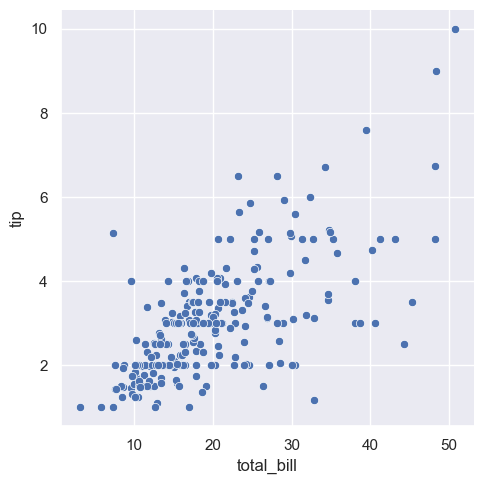

In [4]:
sns.relplot(data=tips, x='total_bill', y='tip')
plt.show()

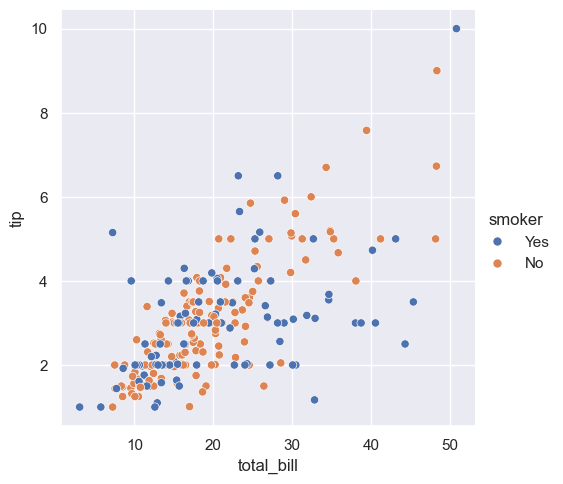

In [5]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='smoker')
plt.show()

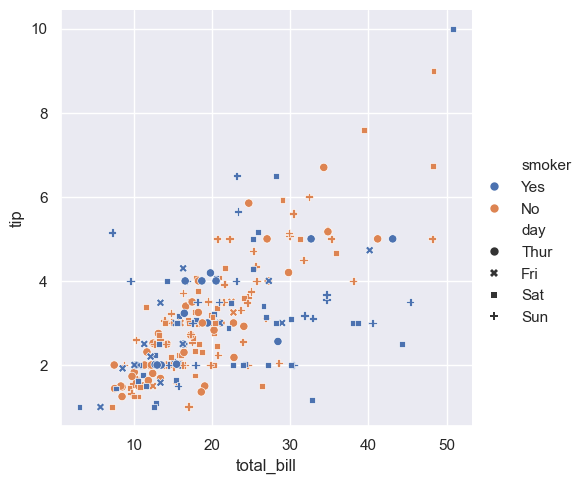

In [6]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='smoker', style='day')
plt.show()

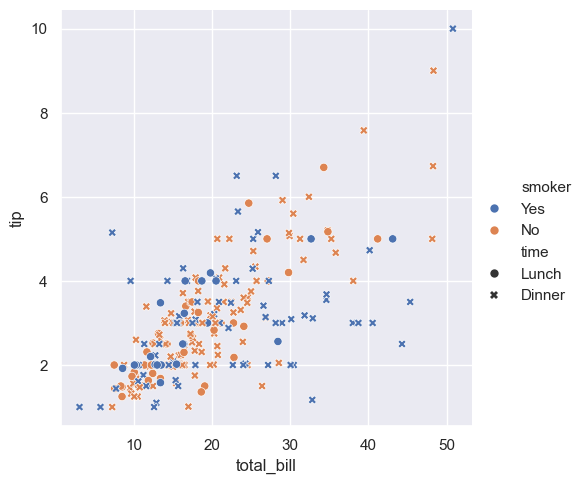

In [7]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='smoker', style='time')

in above examples, hue is in alphabetical form but int below example, it is in numeric form that is why the default coloring switches to a sequential palette.

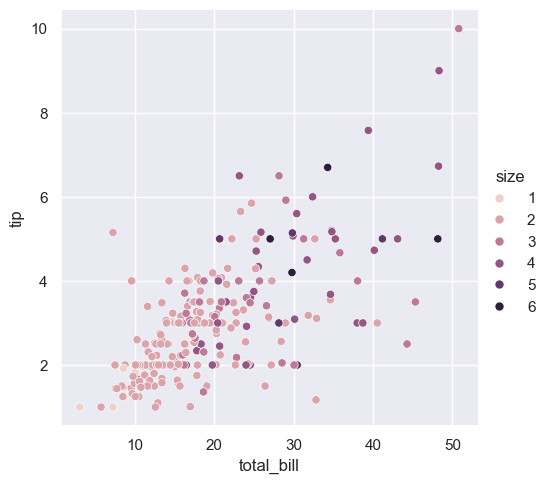

In [8]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='size')

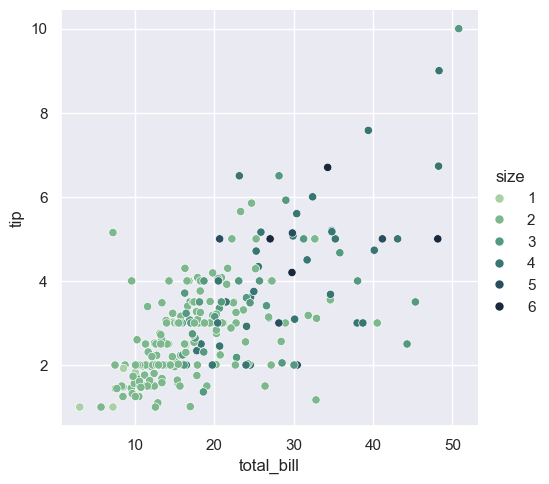

In [9]:
sns.relplot(data=tips, x='total_bill', y='tip', 
            hue='size', palette='ch: r=-.5, l=.75')

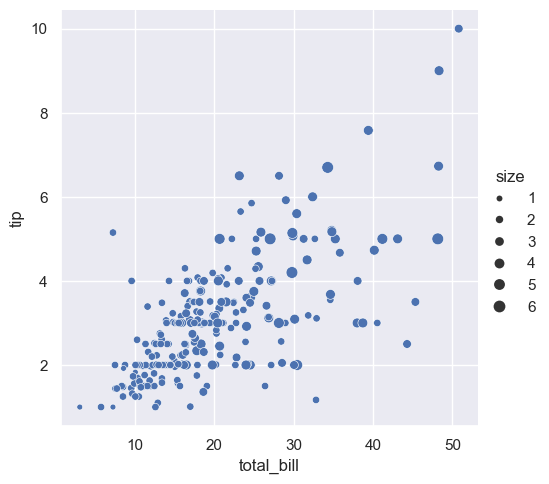

In [10]:
sns.relplot(data=tips, x='total_bill', y='tip', size='size')

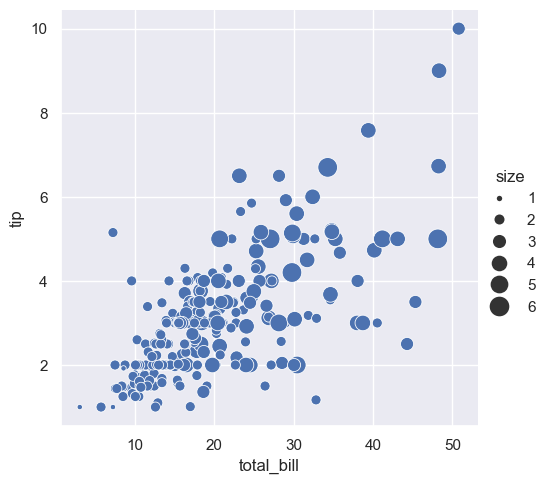

In [11]:
sns.relplot(data=tips, x='total_bill', y='tip', 
            size='size',sizes=(15, 200))

### Emphasizing continuity with line plots

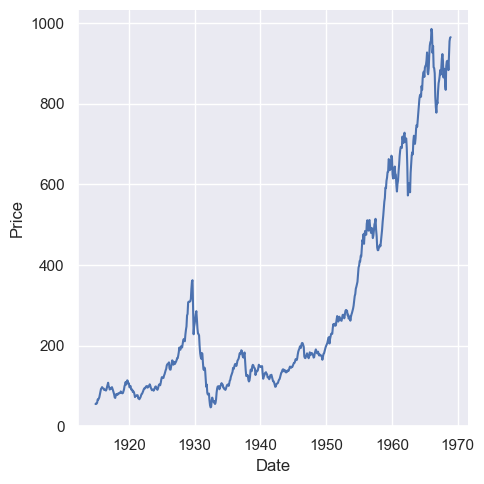

In [15]:
dowjones = sns.load_dataset("dowjones")
sns.relplot(data=dowjones, x="Date", y="Price", kind='line')

### Aggregation and representing uncertainty

In [13]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']